In [1]:
import numpy as np
#import math
#import time
import scipy.io as sio
import scipy.ndimage.filters as fimg
import scipy.ndimage as im
from scipy import signal
#import scipy.ndimage as im
import sys
import glob

import os

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
#%matplotlib qt
%matplotlib nbagg
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#local functions
sys.path.append('/Users/tbarillot/Documents/PostDoc_imperial_LabMac/AttoPPExperiment007/Isopropanol/TOFAccumulation')
sys.path.append('/Users/tbarillot/Documents/PostDoc_imperial_LabMac/007_repositories/DataAcquisition/TOF')
sys.path.append('/Users/tbarillot/Documents/PostDoc_imperial_LabMac/007_repositories/SingleShotData/PeakFinding')



#sys.path.append('/Users/thomasbarillot/Documents/Post_Doc_imperial/007_repositories/TOFAccumulation')
#sys.path.append('/Users/thomasbarillot/Documents/Post_Doc_imperial/007_repositories/DataAcquisition/TOF')

import TOFAccMassBinningFunc as TBF
import IndexMassConv as IMC

import TOFPeakFinding as TPF

from PeakFinder import PeakFinder

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
#import psana
#import numpy as np
import os, sys
import warnings
#import pypsalg

scans_pathname='/Volumes/Seagate Expansion Drive 1/labdata/2016/20160526_Isopropanol/'
#sys.path.append('/reg/neh/home/alvarosg/amoj1516/postanalysis/utils')
#from XTCExporter import XTCExporter
from PeakFinder import PeakFinder

#runnum=240
#experiment='amoj1516'           
#run=runnum                      
#namefile='ACQIonPeaks'                
#XTCE=XTCExporter(experiment,run,namefile)                       
#ACQ = psana.Detector('ACQ1')                          
ampslist=[]
#ampslist.append(np.zeros((0),dtype=np.float32))
print 'ampslist:',ampslist
def GetACQEdges(evt):
    global time,signal,evtout,ampslist
    evtout=evt
        
    ACQWave = evt
    ACQTime = np.arange(0,4000,0.5)
    
    if ACQWave is None or ACQTime is None: 
        return None
    else:
        time=ACQTime[750:-1000]
        signal=ACQWave[750:-1000]
        
        inds,amps=PeakFinder(signal).StandardAnalysis() 
        if inds.shape[0]==0:
            return None       
        timepeaks=np.interp(inds,range(len(time)),time)
        print 'amps:',amps
        ampslist.append(amps)
        return None

folders=[2134]
test=[]
for i,f in enumerate(folders):
    
    randomdelay=np.random.randint(40,size=1)
    fname=scans_pathname+'20160526_%s_Scan/SSdelay%s' % (str(f).zfill(4),str(randomdelay[0]).zfill(2))
    print randomdelay
    randomfile=np.random.randint(120,size=6)
    print randomfile
    for k,h in enumerate(randomfile):
        Scan=sio.loadmat(fname+'/specfile_%s.mat' % str(randomfile[k]).zfill(3),squeeze_me=True,struct_as_record=False)
        S=np.reshape(Scan['specmat_ChA'],(1000,8000))
        #IR=np.reshape(Scan['specmat_ChB'],(1000,5000))
        randomshot=np.random.randint(1000,size=100)
    
        for j,n in enumerate(randomshot):
            SStof=-S[randomshot[j],:]
            std=np.std(SStof[:2000])
            mean=np.mean(SStof[:2000])
            med=np.median(SStof[:2000])
            
            FTtof=np.fft.fft(SStof-med)
            FTtof[15:30]=fimg.median_filter(FTtof[15:30].real,2)
            FTtof[4970:4985]=fimg.median_filter(FTtof[4970:4985].real,2)
        
            SStofcleaned=np.fft.ifft(FTtof)
            
            GetACQEdges(SStofcleaned.real)

#ampslist.append(np.zeros((0),dtype=np.float32))





ampslist: []
[8]
[ 6  4 79 63 14 71]
amps: [  162.86942522   352.78236074   157.0804953    369.41820734   136.57547279
   165.43102907  1291.50109742]
amps: [  139.68591865   104.66097997   265.62039388   151.39860484   320.98962474
   321.18065622   116.45625291   321.57654741   593.51581724  1203.7868728
  1419.57191183    67.06318251   123.37274108   149.02241548]
amps: [  248.87970776   255.37402653   101.08455544   191.42525632   181.63162975
   107.77419551   308.81315498  2114.41262038   515.08055912   588.87730262
   109.85458591   223.90775796   247.88414982   832.00477896   106.09886664]
amps: [  331.41225575   210.92730519   371.27425118  2431.94693711]
amps: [  353.23727562   266.54783453   317.68848036   185.00828892   216.5292744
   189.79129255  1464.92414761   174.7562428    858.29763465   150.93576564
   216.31400405]
amps: [  174.96668344   268.52119      215.09452794   327.13816256   217.32799106
   364.92795651  1268.15548458   316.95182513   340.31442458]
amps: [  

In [103]:
print np.concatenate(ampslist)


[ 234.   269.   359.  ...,  285.5  479.   141. ]


(201,)


<IPython.core.display.Javascript object>


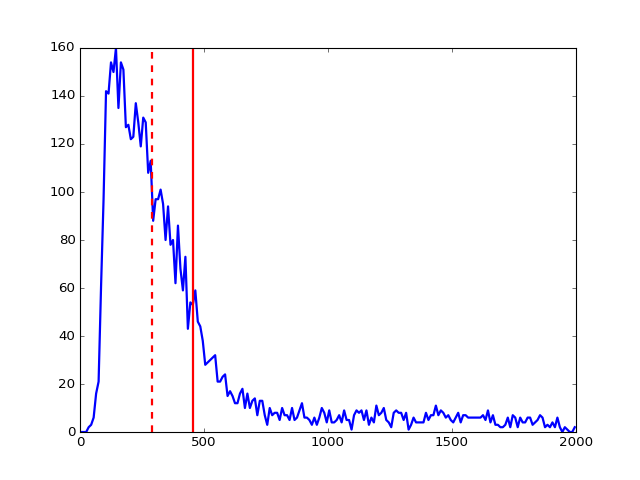

In [6]:
limits=[[0.031,0.041],[0.0045,0.006]]
histo,edges=np.histogram(np.concatenate(ampslist),bins=200,range=(0,2000))
centers=(edges[:-1]+edges[1:])/2.0
print edges.shape

plt.figure()
plt.plot(centers,histo);
plt.axvline(np.median(np.concatenate(ampslist)),color='r',linestyle='--')
plt.axvline(np.mean(np.concatenate(ampslist)),color='r',linestyle='-')
#plt.axvline(x=limits[0][0],color='r')
#plt.axvline(x=limits[0][1],color='r')

In [25]:
#import psana
import numpy as np
import os, sys
import warnings
#import pypsalg

#from XTCExporter import XTCExporter
from PeakFinder import PeakFinder


scans_pathname='/Volumes/Seagate Expansion Drive 1/labdata/2016/20160526_Isopropanol/'


limits=[50.0,500.0]
#experiment='amoj1516'           
#run=runnum                      
#namefile='ACQIonPeaks'                
#XTCE=XTCExporter(experiment,run,namefile)
                                  
#ACQ = psana.Detector('ACQ1')                          

extendm=15 # in ns
extendp=60 # in ns

timetemplate=np.linspace(-extendm,extendp,150)
template=[]
template.append(np.zeros(len(timetemplate),dtype=np.float64))
#template.append(np.zeros(len(timetemplate),dtype=np.float64))
count=np.zeros(1)


def GetACQEdges(evt):
    global time,signal,evtout,template,count
    evtout=evt
        
    ACQWave = evt
    ACQTime = np.arange(0,4000,0.5)
    
    if ACQWave is None or ACQTime is None: 
        return None
    else:
        time=ACQTime[0:-1000]
        signal=ACQWave[0:-1000]
        #print signal
        inds,amps=PeakFinder(signal).StandardAnalysis()
        #print inds
        if inds.shape[0]==0:
            return None
        
        timepeaks=np.interp(inds,range(len(time)),time)
        N=len(timepeaks)
        
        listinds=np.where((amps>limits[0])*(amps<limits[1]))[0]
        #print listinds
        #if channel==1:
        #    print len(amps), amps
        #    print len(listinds)
        
        for i in listinds:
            peak=timepeaks[i]

            if i>0 and (peak-timepeaks[i-1])<3*extendm:
                continue
            if i<N-1 and (timepeaks[i+1]-peak)<3*extendp:
                continue       
            template+=np.interp(timetemplate,time-peak,signal,left=0,right=0)
            count+=1
            
        
        return None

folders=[2134]

for i,f in enumerate(folders):
    
    randomdelay=np.random.randint(40,size=1)
    fname=scans_pathname+'20160526_%s_Scan/SSdelay%s' % (str(f).zfill(4),str(randomdelay[0]).zfill(2))
    print randomdelay
    randomfile=np.random.randint(120,size=10)
    print randomfile
    for k,h in enumerate(randomfile):
        Scan=sio.loadmat(fname+'/specfile_%s.mat' % str(randomfile[k]).zfill(3),squeeze_me=True,struct_as_record=False)
        S=np.reshape(Scan['specmat_ChA'],(1000,8000))
        #IR=np.reshape(Scan['specmat_ChB'],(1000,5000))
        randomshot=np.random.randint(1000,size=500)
    
        for j,n in enumerate(randomshot):
            SStof=-S[randomshot[j],:]
            std=np.std(SStof[:2000])
            mean=np.mean(SStof[:2000])
            med=np.median(SStof[:2000])
            
            FTtof=np.fft.fft(SStof-med)
            FTtof[15:30]=fimg.median_filter(FTtof[15:30].real,2)
            FTtof[4970:4985]=fimg.median_filter(FTtof[4970:4985].real,2)
        
            SStofcleaned=np.fft.ifft(FTtof)
            
            GetACQEdges(SStofcleaned.real)

#ampslist.append(np.zeros((0),dtype=np.float32))





#XTCE.AddEventTask(lambda XTCE,evt: GetACQEdges(XTCE,evt,0),'ACQCh0Peaks','list',np.float32)
#XTCE.AddEventTask(lambda XTCE,evt: GetACQEdges(XTCE,evt,1),'ACQCh1Peaks','list',np.float32)
#XTCE.ProcessRun(maxshots=1000)
#GetACQEdges(SStof)
#print template

[33]
[ 27  51 100  81  52  14  89  85 101  48]


<IPython.core.display.Javascript object>


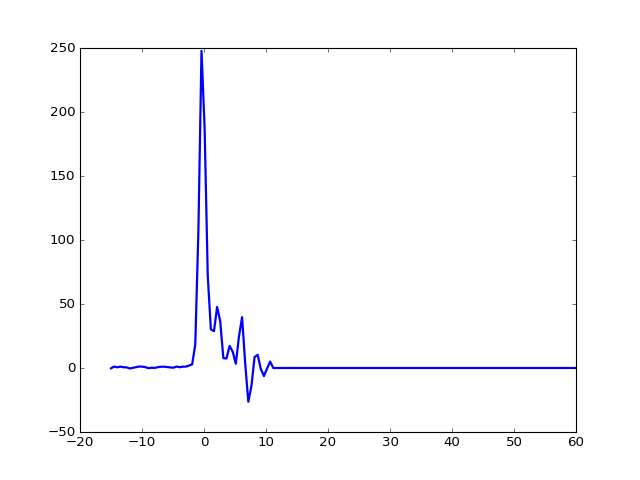

In [26]:
finaltemplate=template[0]/count-np.mean(template[0][80:]/count)
finaltemplate[52:]=np.median(finaltemplate[52:])
plt.figure()
plt.plot(timetemplate,finaltemplate,'-')

[39]
[28]


<IPython.core.display.Javascript object>


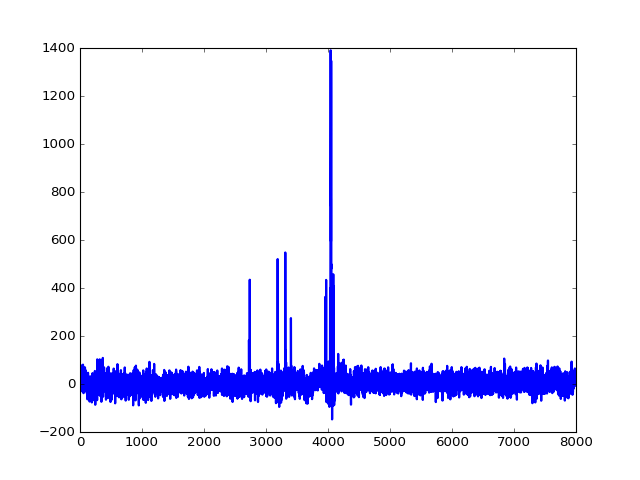

In [57]:
## TEST TEMPLATE: CHOOSE THE SINGLE SHOT TRACE (RANDOMLY)
for i,f in enumerate(folders):
    
    randomdelay=np.random.randint(40,size=1)
    fname=scans_pathname+'20160526_%s_Scan/SSdelay%s' % (str(f).zfill(4),str(randomdelay[0]).zfill(2))
    print randomdelay
    randomfile=np.random.randint(120,size=1)
    print randomfile
    for k,h in enumerate(randomfile):
        Scan=sio.loadmat(fname+'/specfile_%s.mat' % str(randomfile[k]).zfill(3),squeeze_me=True,struct_as_record=False)
        S=np.reshape(Scan['specmat_ChA'],(1000,8000))
        #IR=np.reshape(Scan['specmat_ChB'],(1000,5000))
        randomshot=np.random.randint(1000,size=1)
    
        for j,n in enumerate(randomshot):
            SStof=-S[randomshot[j],:]
            std=np.std(SStof[:2000])
            mean=np.mean(SStof[:2000])
            med=np.median(SStof[:2000])
            
            FTtof=np.fft.fft(SStof-med)
            FTtof[15:30]=fimg.median_filter(FTtof[15:30].real,2)
            FTtof[4970:4985]=fimg.median_filter(FTtof[4970:4985].real,2)
        
            SStofcleaned=np.fft.ifft(FTtof)
            
plt.figure()
plt.plot(SStofcleaned)

<IPython.core.display.Javascript object>


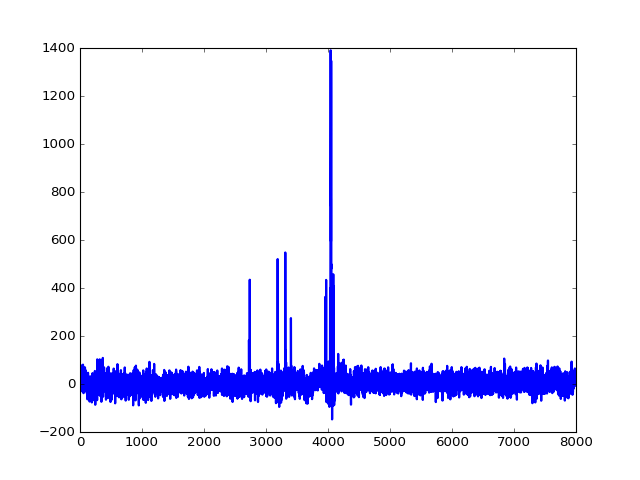

Convergence of peakfinding SUCCESS


<IPython.core.display.Javascript object>


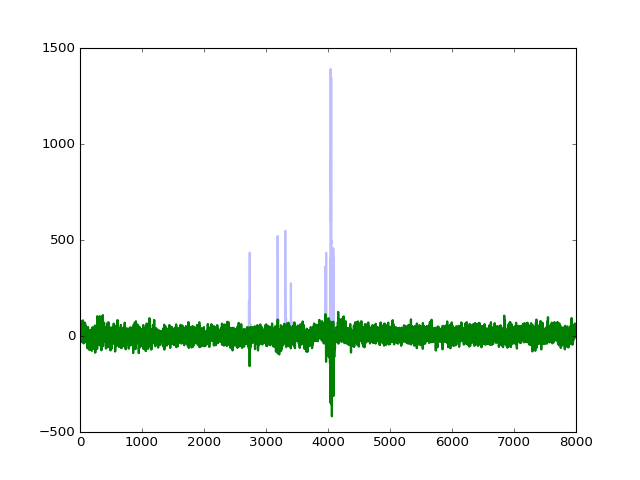

<IPython.core.display.Javascript object>


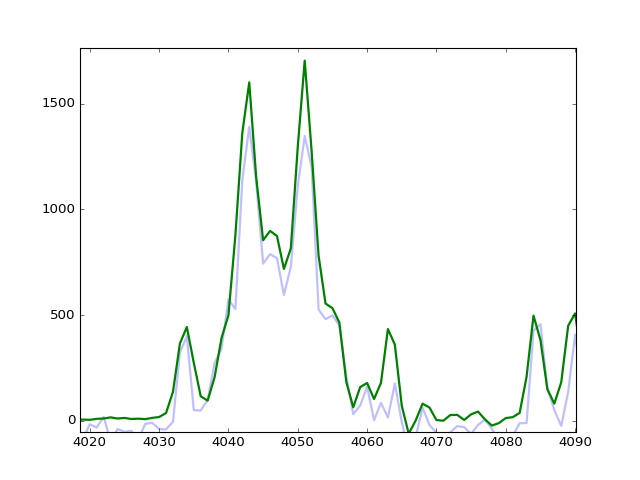

<IPython.core.display.Javascript object>


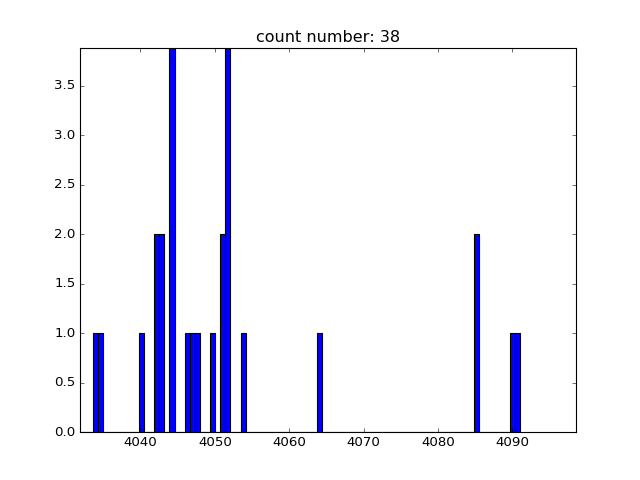

In [61]:
## TEST TEMPLATE: ITTERATIVELY APPLY THE TEMPLATE

tmptemplate=[]

#inds,amps=PeakFinder(SStofcleaned.real).StandardAnalysis()
plt.figure()
plt.plot(SStofcleaned.real)

SStofiteration=SStofcleaned.real
reconstructtof=np.zeros((len(SStofcleaned.real)))
indices=[]
for i in range(0,30):
    inds,amps=PeakFinder(SStofiteration).StandardAnalysis()
    if len(inds)==0:
        print 'Convergence of peakfinding SUCCESS'
        break
    if i>20:
        print 'Convergence of peakfinding FAILED'
        break
    indices.append(inds)
    for j in range(0,len(inds)):
        tmptemplate=np.pad(finaltemplate,(inds[j]-30,8000-(inds[j]+120)),'constant',constant_values=(0,0))
        SStofiteration=SStofiteration-tmptemplate
        reconstructtof+=tmptemplate
    
     
plt.figure()
plt.plot(SStofcleaned.real,alpha=0.25)
plt.plot(SStofiteration)
plt.plot(inds,amps,'ro')

plt.figure()
plt.plot(SStofcleaned.real,alpha=0.25)
plt.plot(reconstructtof)

plt.figure()
plt.hist(np.concatenate(indices),bins=2000)
plt.xlim([0,8000])
plt.title('count number: %i' % (len(np.concatenate(indices))))


In [18]:
pathsave='/reg/neh/home/alvarosg/amoj1516/SinglePeakTemplates'
filename='%s/run%04d.npz'%(pathsave,runnum)
np.savez(filename,time=timetemplate,templates=np.array(finaltemplate))




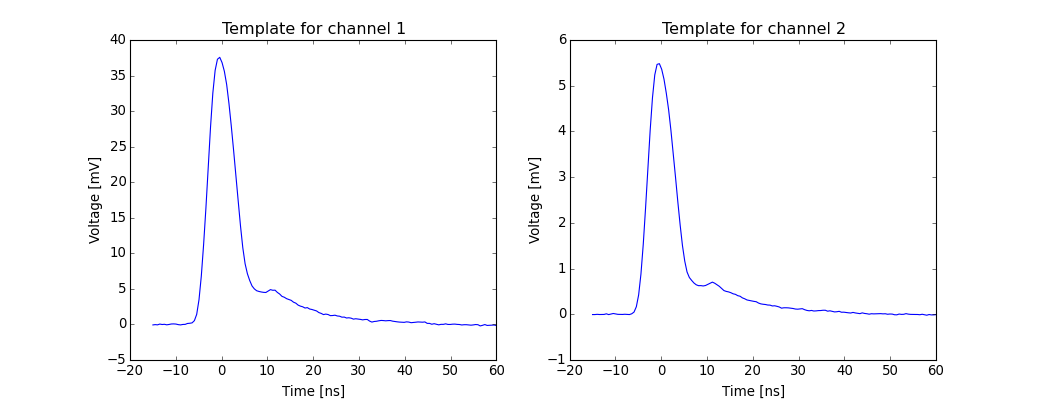

In [9]:

pathtemplates='/reg/neh/home/alvarosg/amoj1516/SinglePeakTemplates'
filetemplate='%s/run%04d.npz'%(pathtemplates,240)
template=np.load(filetemplate)
templatetime=template['time']
templatesignal=template['templates']

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(templatetime*1e9,templatesignal[0]*1e3)
plt.ylabel('Voltage [mV]')
plt.xlabel('Time [ns]')
plt.title('Template for channel 1')

plt.subplot(1,2,2)
plt.plot(templatetime*1e9,templatesignal[1]*1e3)
plt.ylabel('Voltage [mV]')
plt.xlabel('Time [ns]')
plt.title('Template for channel 2')

In [73]:
inds

array([], dtype=float64)

In [86]:
a=np.linspace(1,5,5)
a[0:6]

array([ 1.,  2.,  3.,  4.,  5.])

In [88]:
np.max([1,2])

2